In [1]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl as xl
from lmfit import minimize, Parameters, report_fit

In [2]:
'''Import data and get the length of data'''
x = []
y = []
wb = xl.load_workbook('D:\getdata\single_peak_cwodmr\data2.xlsx')
sheet = wb['Sheet1']

for row in range(1, sheet.max_row + 1):
    x.append(sheet.cell(row,1).value)
for row in range(1, sheet.max_row + 1):
    y.append(sheet.cell(row,2).value)

x_data =np.array(x)
y_data =np.array(y)
n = len(x_data)

In [3]:
def g(x,a):
    g = a[0]*(1-a[1]*(a[2]/2)**2/((x-a[3])**2+(a[2]/2)**2))
    return g

In [4]:
def residual(params, x, data):
    v = params.valuesdict()
    a = [v['a1'], v['a2'], v['a3'], v['a4']]
    model = g(x,a)
    return (data-model)

params = Parameters()
params.add('a1', value=1)
params.add('a2', value=0.012)
params.add('a3', value=0.02)
params.add('a4', value=2.654)

out = minimize(residual, params, args=(x_data, y_data))
report_fit(out)
fitted_params = []
for name, param in out.params.items():
    fitted_params.append(param.value)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 39
    # variables        = 4
    chi-square         = 5.6556e-06
    reduced chi-square = 1.6159e-07
    Akaike info crit   = -606.110957
    Bayesian info crit = -599.456710
[[Variables]]
    a1:  1.00010525 +/- 1.1086e-04 (0.01%) (init = 1)
    a2:  0.01280656 +/- 2.1356e-04 (1.67%) (init = 0.012)
    a3:  0.01434697 +/- 4.7366e-04 (3.30%) (init = 0.02)
    a4:  2.65359120 +/- 1.1349e-04 (0.00%) (init = 2.654)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a3) = 0.595
    C(a2, a3) = -0.386
    C(a1, a2) = 0.279


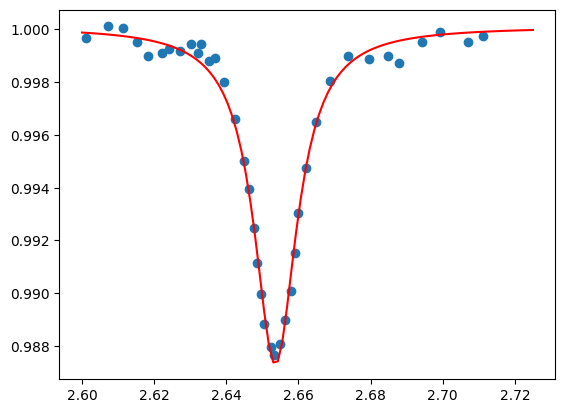

In [5]:
plt.scatter(x_data,y_data)
x = np.linspace(2.6,2.725,100)
y = g(x,fitted_params)
plt.plot(x,y,'r')
plt.show()